<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/analysis/risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

미국
- 실업률
- Core CPI
- PMI
- PPI
- IC (실업수당청구건수)

시장
- vix
- CDS

스프레드
- TED spread
- 10Y - 2Y spread
- 10Y - 3M spread
- high yield spread

한국
- 환율 DEXKOUS
- 수출 XTEXVA01KRM667S
- 생산량 KORPROINDMISMEI

https://fred.stlouisfed.org/series/QKRR368BIS 이건 부동산

In [1]:
import requests
from io import StringIO
import numpy as np
import pandas as pd
from datetime import datetime

def get_df(id, tail=3600):
  url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=' + id + '&revision_date=' + datetime.today().strftime('%Y-%m-%d') + '&nd=1901-01-01'
  r = requests.get(url)
  s = str(r.content,'utf-8')
  data = StringIO(s) 
  df = pd.read_csv(data)
  df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
  df[id] = [np.nan if x=='.' else float(x) for x in df[id]]
  df = df.set_index('DATE')
  df = df.rename(columns={id: "data"})
  return df.ffill().tail(tail)

In [2]:
ted_df = get_df('TEDRATE')
t10y2y_df = get_df('T10Y2Y')
t10y3m_df = get_df('T10Y3M')
hy_df = get_df('BAMLH0A0HYM2')

In [3]:
hy_df['data'].mean()

5.267647222222222

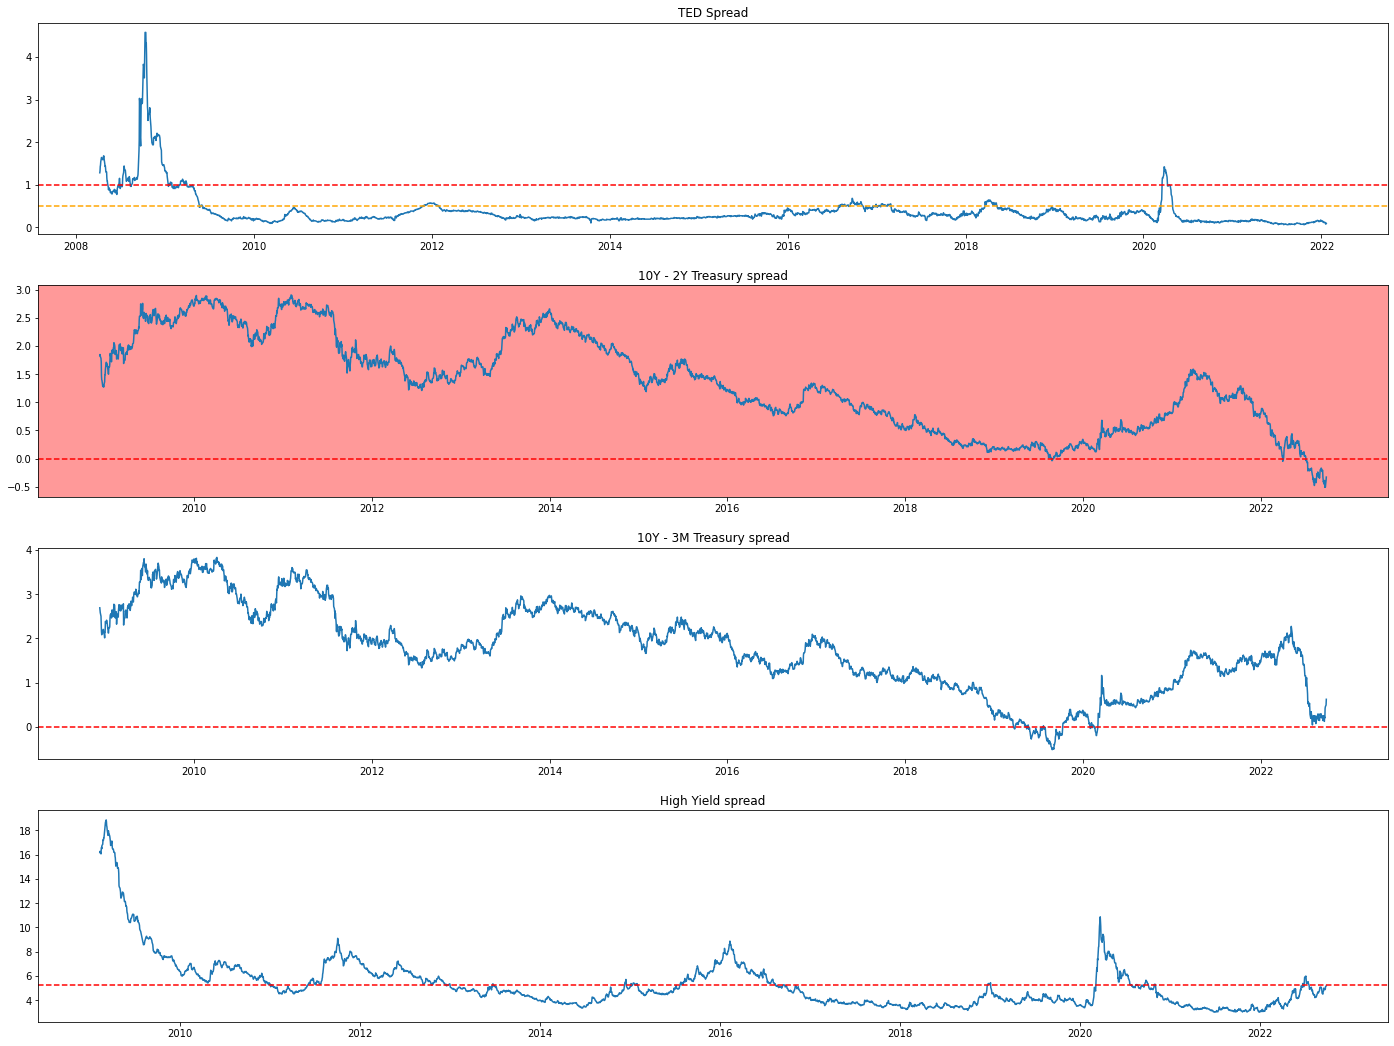

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 1, figsize=(20,15))
fig.tight_layout(pad=3.0)

axs[0].title.set_text('TED Spread')
axs[0].plot(ted_df)
axs[0].axhline(0.5, color = 'orange', linestyle = '--')
axs[0].axhline(1, color = 'red', linestyle = '--')
if ted_df.iloc[-1][0] > 0.5: axs[0].set_facecolor('#ffaa80')
elif ted_df.iloc[-1][0] > 1: axs[0].set_facecolor('#ff9999')

axs[1].title.set_text('10Y - 2Y Treasury spread')
axs[1].plot(t10y2y_df)
axs[1].axhline(0, color = 'r', linestyle = '--')
if t10y2y_df.iloc[-1][0] < 0: axs[1].set_facecolor('#ff9999')

axs[2].title.set_text('10Y - 3M Treasury spread')
axs[2].plot(t10y3m_df)
axs[2].axhline(0, color = 'r', linestyle = '--')
if t10y3m_df.iloc[-1][0] < 0: axs[2].set_facecolor('#ff9999')

axs[3].title.set_text('High Yield spread')
axs[3].plot(hy_df)
axs[3].axhline(hy_df['data'].mean(), color = 'r', linestyle = '--')
if t10y3m_df.iloc[-1][0] > hy_df['data'].mean(): axs[3].set_facecolor('#ff9999')
fig.show()

koraa

In [5]:
usdkrw_df = get_df('DEXKOUS')